In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_mushroom=pd.read_csv('mushroom_csv.csv')
df_mushroom

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [5]:
df_mushroom.shape

(8124, 23)

In [6]:
df_mushroom.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [7]:
# A lot of data in 'stalk-root' is mission , we can drop this column

df_mushroom.drop(['stalk-root'],axis=1,inplace=True)

In [8]:
df_mushroom.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [9]:
df_mushroom.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


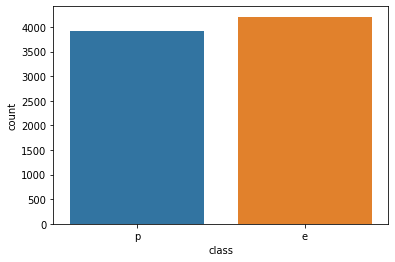

In [11]:
#We can check the count of each class of mushroom graphically
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="class",data=df_mushroom)
plt.show()

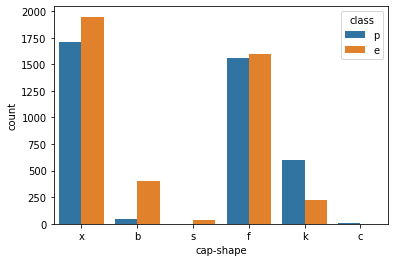

In [12]:
#We can check the count based on cap shape
sns.countplot(x="cap-shape",hue="class",data=df_mushroom)
plt.show()
# with cap-shaped as x and f both have alsmost equal count of poisonous and not edible mushrooms
#with cap shaped as k poisonous are more and with cap shaped b and s edible are more.

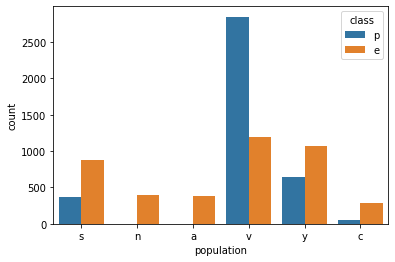

In [13]:
#Check the counts on the basis of population
sns.countplot(x="population",hue="class",data=df_mushroom)
plt.show()

In [20]:
# In this data set we need encryption as data is not in the form of string/numbers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat', 'class']
for val in list:
    df_mushroom[val]=le.fit_transform(df_mushroom[val].astype(str))
         

In [21]:
df_mushroom

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,6,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,6,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,7,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,7,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,6,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,3,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,3,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,7,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


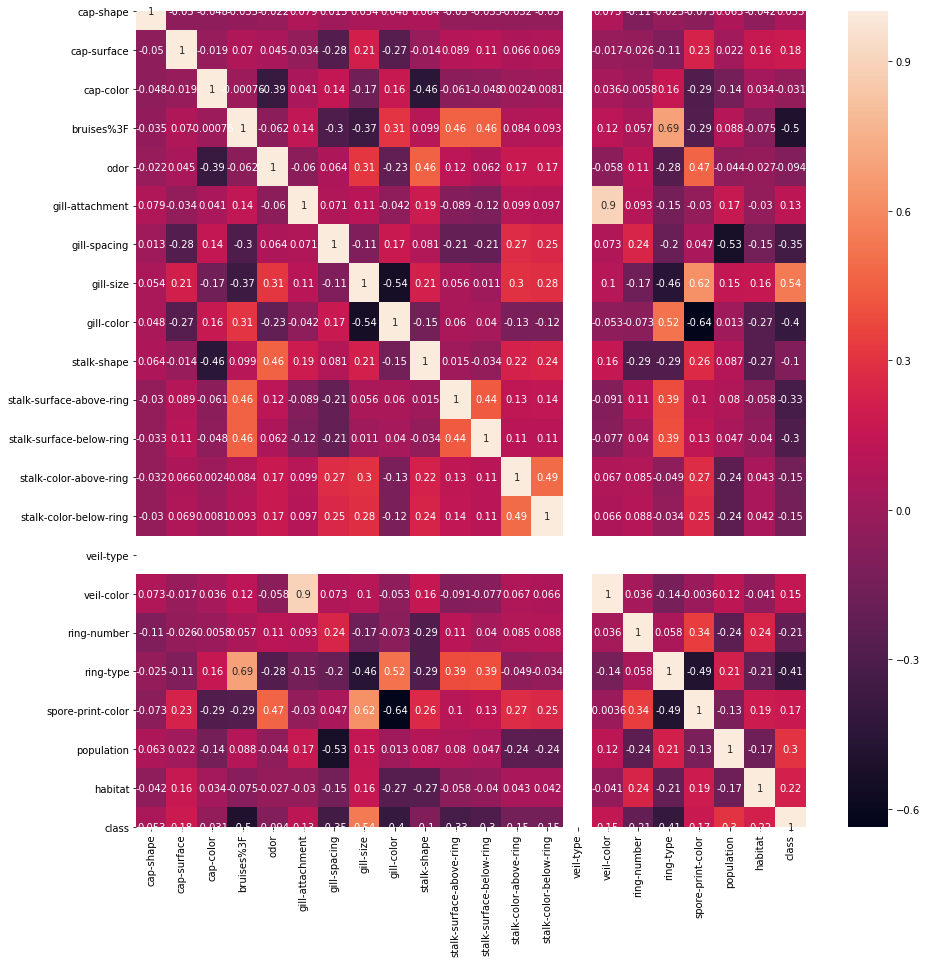

In [30]:
# Checking Correlation on heatmap
corr_mush=df_mushroom.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mush, annot= True)
plt.show()

In [31]:
# Perfroming Regression , Machine learningimport sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



In [32]:
x=df_mushroom.iloc[:,0:-1]
x.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,6,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,6,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,7,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,6,1,...,2,7,7,0,2,1,0,3,0,1


In [33]:
y=df_mushroom.iloc[:,-1]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [34]:
max_r_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state = r_state,test_size=0.30)
    lr=linear_model.LogisticRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    print('r2_score corresponding to random state: ',r_state, 'is' , r2_scr)
    if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  42 is 0.8062103701069102
r2_score corresponding to random state:  43 is 0.7801186594111451


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  44 is 0.8080289121597976
r2_score corresponding to random state:  45 is 0.7881663540259924


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  46 is 0.7915582806887155
r2_score corresponding to random state:  47 is 0.7881863274975502
r2_score corresponding to random state: 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 48 is 0.7948132009006
r2_score corresponding to random state:  49 is 0.7883231870450577


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  50 is 0.7801476620180476
r2_score corresponding to random state:  51 is 0.821898386896033


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  52 is 0.7750401418164576
r2_score corresponding to random state:  53 is 0.7808444531857761


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  54 is 0.7927195288503582
r2_score corresponding to random state:  55 is 0.8094749188371293


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  56 is 0.7833063994828701
r2_score corresponding to random state:  57 is 0.7765480895915678


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  58 is 0.7715598859693649
r2_score corresponding to random state:  59 is 0.7719386913875195


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  60 is 0.7732333012279792
r2_score corresponding to random state:  61 is 0.8076894294110866


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  62 is 0.7996707832234148
r2_score corresponding to random state:  63 is 0.7816378741993768


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  64 is 0.7992474377448782
r2_score corresponding to random state:  65 is 0.7945542552044008


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  66 is 0.7553791245791246
r2_score corresponding to random state:  67 is 0.7745031055900622


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  68 is 0.7915919530017392
r2_score corresponding to random state:  69 is 0.7863652295828952


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  70 is 0.771710544043545
r2_score corresponding to random state:  71 is 0.7749323629992756


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  72 is 0.7815412186379929
r2_score corresponding to random state:  73 is 0.7813101937530686


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  74 is 0.7997820352042091
r2_score corresponding to random state:  75 is 0.784789339802227


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  76 is 0.7832183801195944
r2_score corresponding to random state:  77 is 0.8071880492091389


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  78 is 0.7898809367502997
r2_score corresponding to random state:  79 is 0.7702144561847601


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  80 is 0.7865242327393722
r2_score corresponding to random state:  81 is 0.8077889523424471


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  82 is 0.801168329337576
r2_score corresponding to random state:  83 is 0.7879652683250442


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  84 is 0.8127795101032862
r2_score corresponding to random state:  85 is 0.7734653849339168


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  86 is 0.7667955301286546
r2_score corresponding to random state:  87 is 0.7892565862381709


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  88 is 0.803101276045873
r2_score corresponding to random state:  89 is 0.8093463488296839


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  90 is 0.7881559377930099
r2_score corresponding to random state:  91 is 0.7963127536304143


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  92 is 0.7713903698221958
r2_score corresponding to random state:  93 is 0.8076758147512865


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  94 is 0.8096180553451854
r2_score corresponding to random state:  95 is 0.775123292836055


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  96 is 0.8044915683695254
r2_score corresponding to random state:  97 is 0.7879652683250442


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  98 is 0.7907536560970996
r2_score corresponding to random state:  99 is 0.819442059941358
r2_score corresponding to random state:  100 is 0.8045579477782867


max r2 score corresponding to  51  is  0.821898386896033


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print('Mean Absolute error: ', mean_absolute_error(test_y,pred))
print('Mean Square error: ', mean_squared_error(test_y,pred))

Mean Absolute error:  0.04881050041017227
Mean Square error:  0.04881050041017227


In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [37]:
mnb=MultinomialNB()
score=cross_val_score(mnb,x,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.54411222 0.72562777 0.84410787]
0.7046159521971883
0.12337063359515657


In [38]:
# Cross value score is less/near to Normal so we consider Normal r2 score through linear regression

In [39]:
# To save this Project

from sklearn.externals import joblib
joblib.dump(lr,'lr_mushroom.pkl')

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['lr_mushroom.pkl']